# Cricket Score Predictor

Predicting IPL scores accurately is a challenging task due to the dynamic nature of cricket and the numerous factors influencing the game's outcomes. Traditional machine learning algorithms, while useful, often fall short in capturing complex patterns and dependencies within large datasets. This is where deep learning techniques emerge as a powerful alternative, leveraging their ability to process and analyze vast amounts of data with intricate relationships. By training models on historical performance data of players and teams, deep learning can identify nuanced patterns and make precise predictions. It explores the application of machine learning and deep learning for IPL score prediction, highlighting the comparative advantages of deep learning models in delivering real-time, accurate results.

## 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the dataset

In [2]:
ipl = pd.read_csv('/kaggle/input/ipl-data/ipl_data.csv')

The dataset contain features like venue, date, batting and bowling team, names of batsman and bowler, wickets and more.

## 3. Performing EDA

In [3]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
ipl.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [5]:
ipl.shape

(76014, 15)

In [6]:
ipl.describe

<bound method NDFrame.describe of        mid        date                                      venue  \
0        1  2008-04-18                      M Chinnaswamy Stadium   
1        1  2008-04-18                      M Chinnaswamy Stadium   
2        1  2008-04-18                      M Chinnaswamy Stadium   
3        1  2008-04-18                      M Chinnaswamy Stadium   
4        1  2008-04-18                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76010  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76011  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76012  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76013  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   

                    bat_team                    bowl_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC 

In [7]:
ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## 4. Data Preprocessing

In [9]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

We have created a new dataframe by dropping several columns from the original DataFrame.
The new DataFrame contains the remaining columns that we are going to train the predictive model.

In [10]:
X = df.drop(['total'], axis =1)
y = df['total']

Label Encoding

We have applied label encoding to your categorical features in X.We have created separate LabelEncoder objects for each categorical feature and encoded their values.We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [11]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


Train Test Split

We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Scaling

We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
Scaling is performed to ensure consistent scale to improve model performance.
Scaling has transformed both training and testing data using the scaling parameters.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Data Visualisation

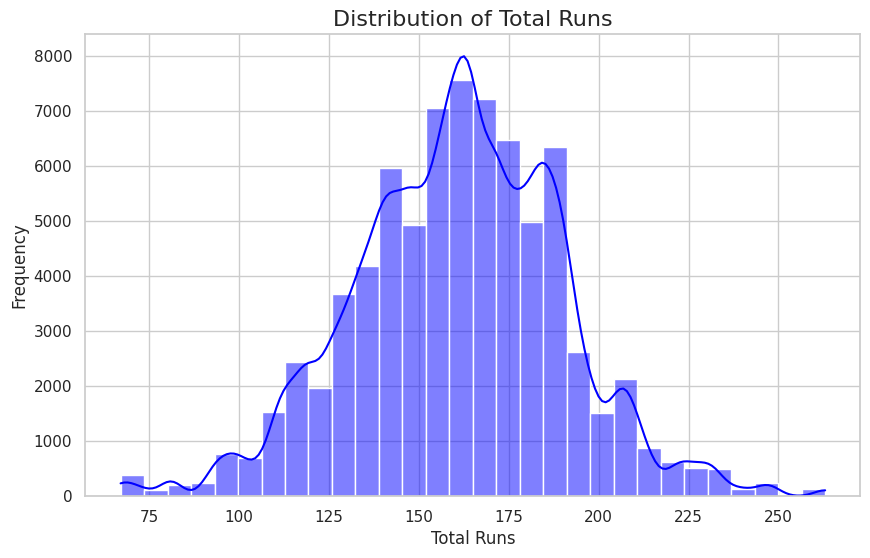

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(ipl['total'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Runs', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

This shows the frequency of number of times a particular total score has been achieved.

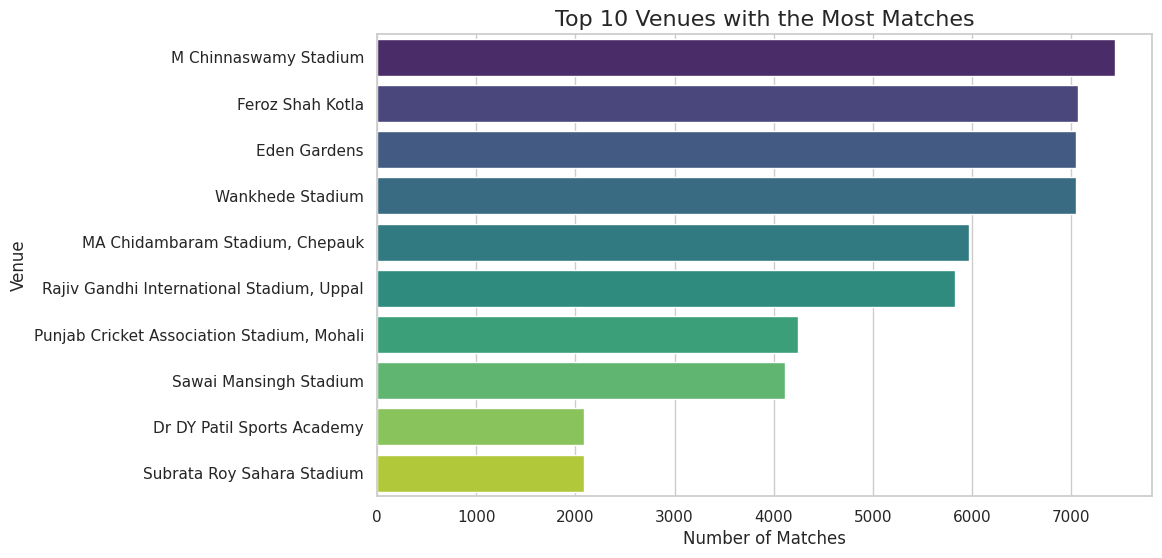

In [15]:
top_venues = ipl['venue'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='viridis')
plt.title('Top 10 Venues with the Most Matches', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.show()

This shows the top 10 venues with number of matches that have been played there.

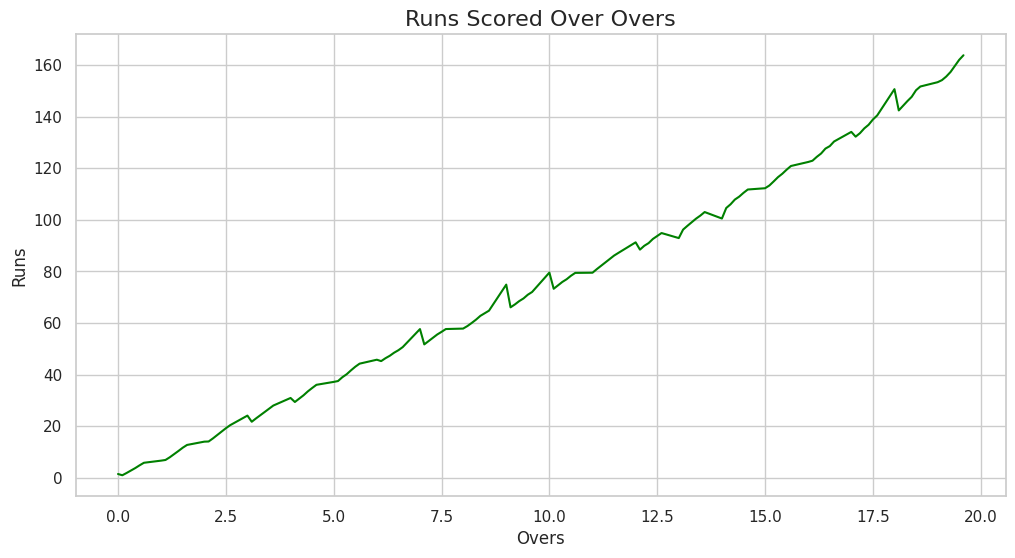

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ipl, x='overs', y='runs', ci=None, color='green')
plt.title('Runs Scored Over Overs', fontsize=16)
plt.xlabel('Overs', fontsize=12)
plt.ylabel('Runs', fontsize=12)
plt.show()

This is the average team score after each over.

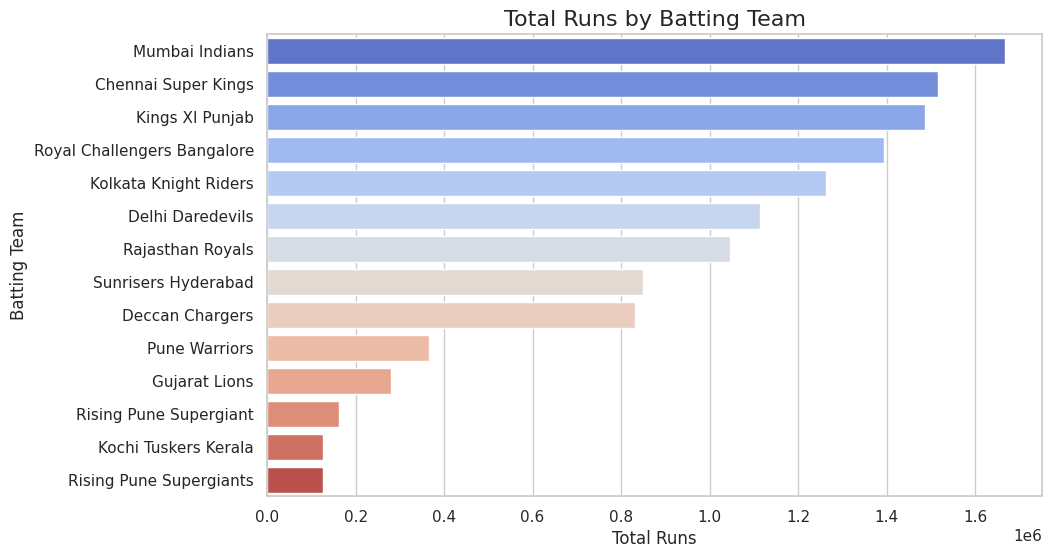

In [17]:
bat_team_totals = ipl.groupby('bat_team')['total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=bat_team_totals.values, y=bat_team_totals.index, palette='coolwarm')
plt.title('Total Runs by Batting Team', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batting Team', fontsize=12)
plt.show()

The total runs scored by each batting team.

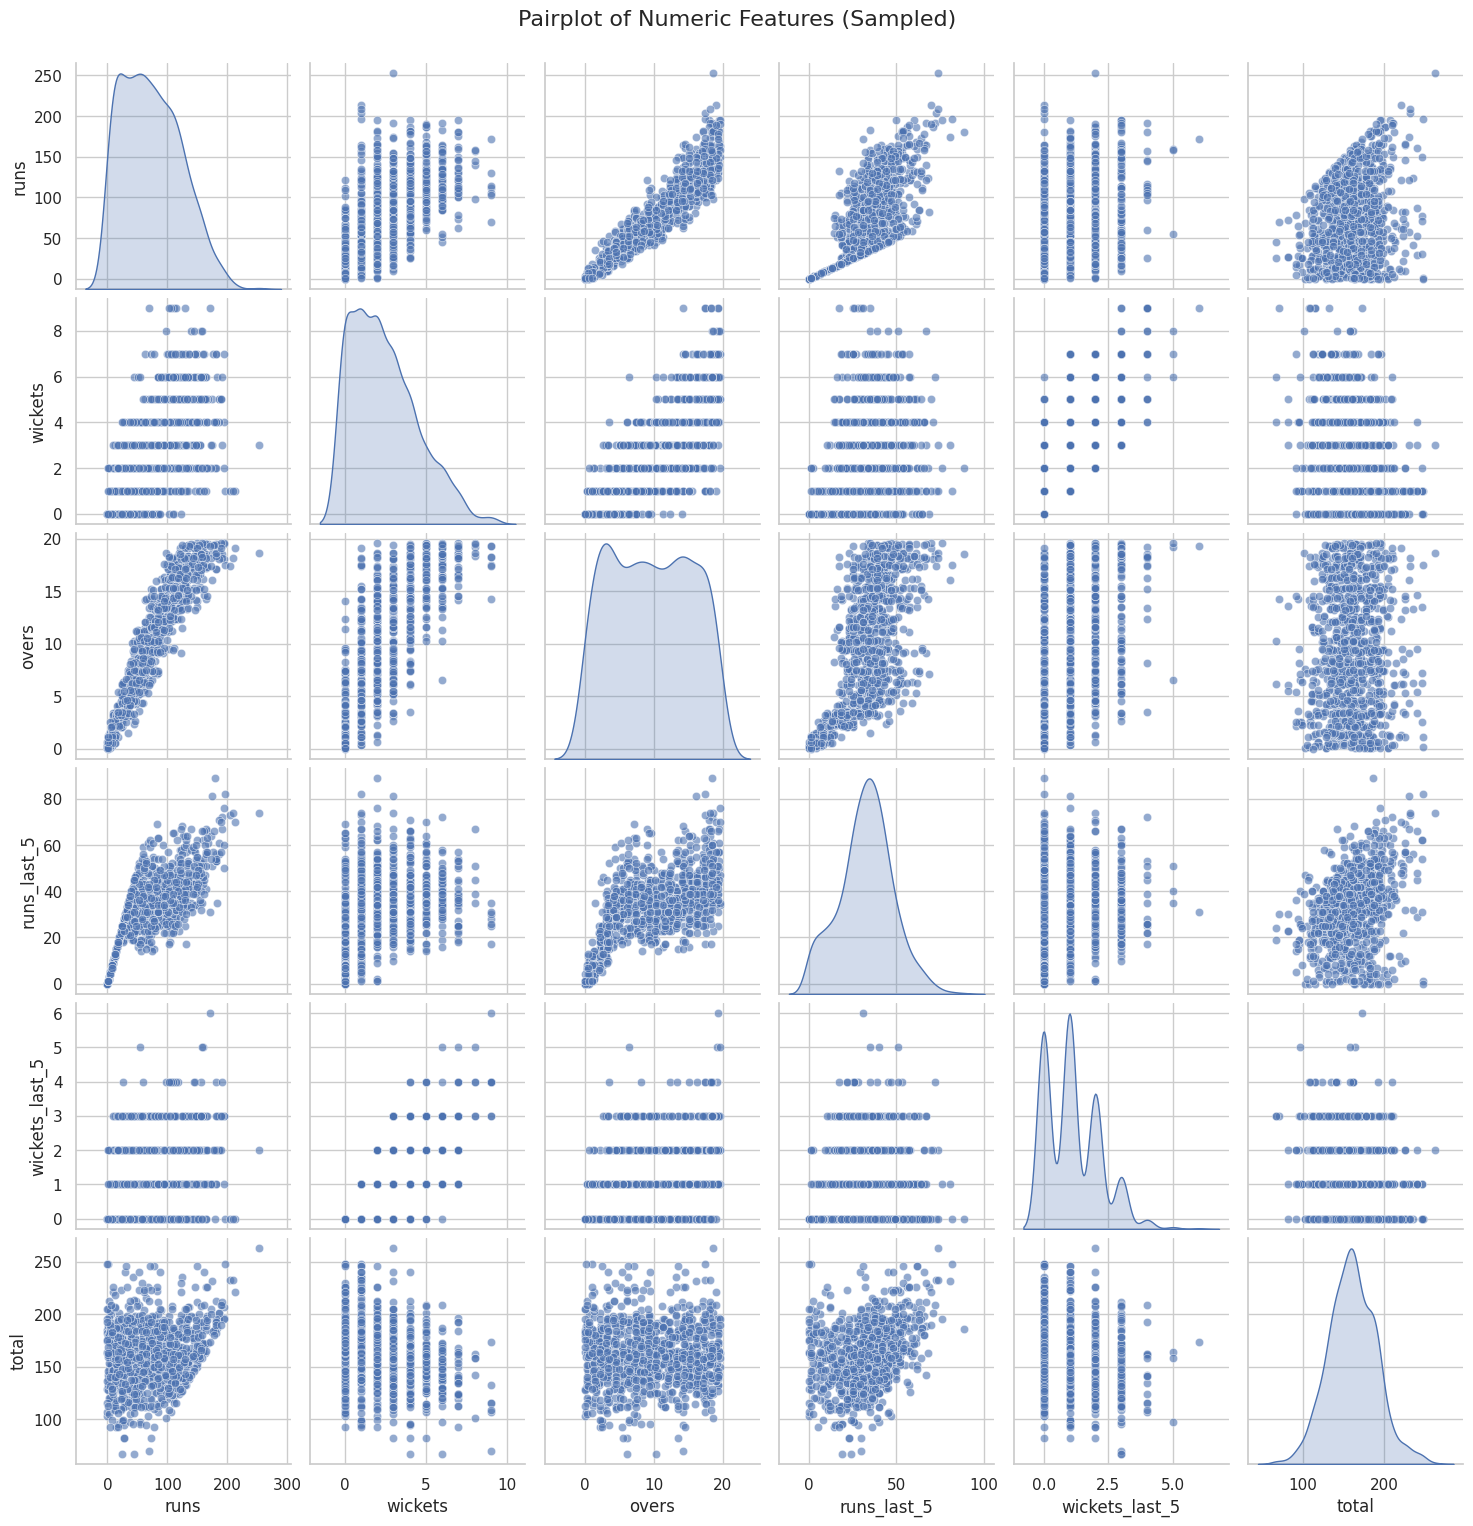

In [18]:
numeric_features = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']
numeric_sample = ipl[numeric_features].sample(1000).astype(float)

sns.pairplot(numeric_sample, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numeric Features (Sampled)', fontsize=16, y=1.02)
plt.show()

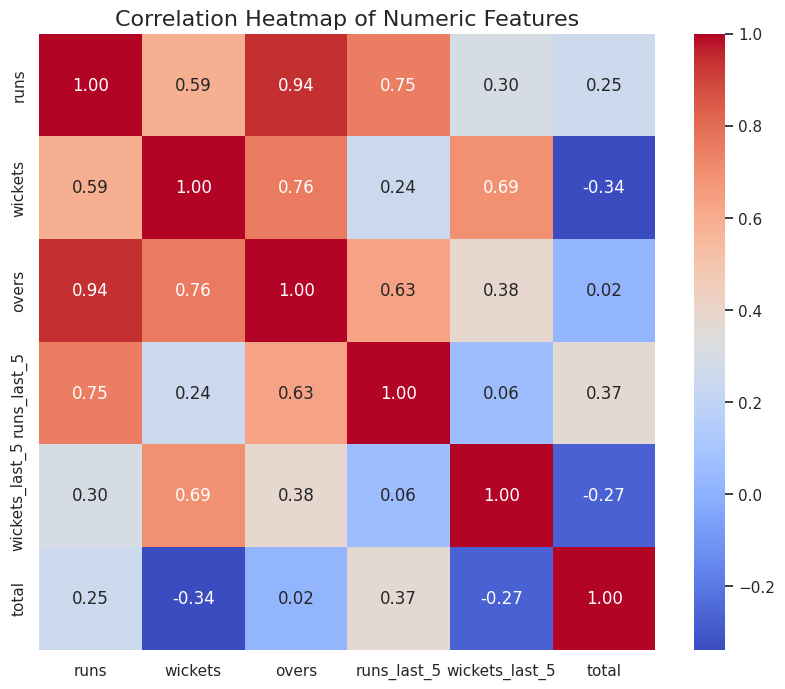

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = ipl[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

## 6. Define the Neural Network

In [20]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(216, activation='relu'),  
    keras.layers.Dense(1, activation='linear')  
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  
model.compile(optimizer='adam', loss=huber_loss)  

#### Training the model

In [21]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 56.1421 - val_loss: 22.2071
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.4900 - val_loss: 21.9993
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2339 - val_loss: 22.0410
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.3176 - val_loss: 22.5981
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2852 - val_loss: 22.0276
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2117 - val_loss: 22.1114
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2086 - val_loss: 21.8117
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0777 - val_loss: 22.0085
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 21.9881 - val_loss: 21.8121
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1494 - val_loss: 21.8006
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1341 - val_loss: 22.4368
Epoch 12/50
832/832 ━━━━━━━━━━

After the training, we have stored the training and validation loss values to our neural network during the training process.




<Axes: >

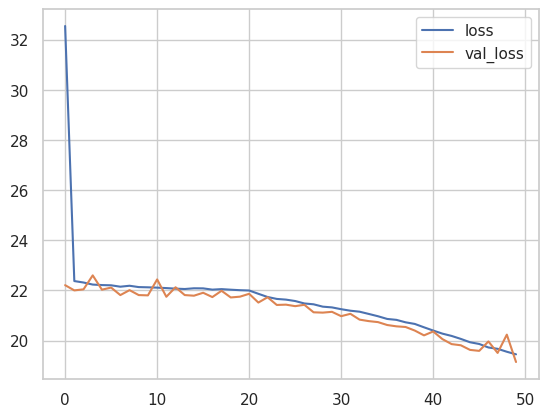

In [22]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Model Evaluation

We have predicted using the trained neural network on the testing data.
The variable predictions contains the predicted total run scores for the test set based on the model’s learned patterns.

In [23]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


19.63278698928522

## 7. Interactive widget for prediction

In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output() 
        
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.





In [25]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

We have predicted the score of the match between RR and RCB in Chinnaswamy Stadium. The predicted score of the match is 172.

### Conclusion

By harnessing the power of ML and DL, we have successfully predicted the cricket scores based on historical data. The model’s ability to predict cricket scores can be a valuable asset for IPL enthusiasts, teams, and analysts. It can provide insights into the dynamics of a match and help anticipate how different factors impact the final score.

